In [10]:
import pandas as pd
from sklearn import linear_model
import joblib as jb
import numpy as np

data = pd.read_csv(
    'https://raw.githubusercontent.com/'
    'devashishpan/major_project/master/Datasets/'
    'rainfall%20in%20india%201901-2017.csv'
)

subdivisions = data.SUBDIVISION.unique()

groups = data.groupby('SUBDIVISION')[['YEAR',
                                      'JAN','FEB','MAR',
                                      'APR','MAY','JUN',
                                      'JUL','AUG','SEP',
                                      'OCT','NOV','DEC'
                                     ]]

def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

def fit_model_elasticnet(train_X, train_Y):
    model = linear_model.ElasticNet(alpha=0.5)
    model.fit(train_X, train_Y)
    return(model)



d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
TRAIN_SIZE = 0.80
window_size = 1

def create_models(groups):
    for i in subdivisions:
        temp = groups.get_group((i))
        temp = temp.melt(['YEAR']).reset_index()
        temp = temp[['index','YEAR','variable','value']].sort_values(by=['YEAR','index'])
        temp.columns=['INDEX','YEAR','Month','avg_rainfall']
        temp['Month'] = temp['Month'].map(d)
        dataset=temp[['avg_rainfall']]
        m = dataset.mean()[0]
        data_raw = dataset.values.astype("float32")
        for i in range(len(data_raw)):
            if(np.isnan(data_raw[i])):
                data_raw[i] = m
        train_size = int(len(data_raw) * TRAIN_SIZE)
        test_size = len(data_raw) - train_size
        train, test = data_raw[0:train_size, :], data_raw[train_size:len(dataset), :]
        train_X, train_Y = create_dataset(train, window_size)
        test_X, test_Y = create_dataset(test, window_size)
        model_elasticnet = fit_model_elasticnet(train_X,train_Y)
        jb.dump(model_elasticnet,f"models/{i}.model")

create_models(groups)

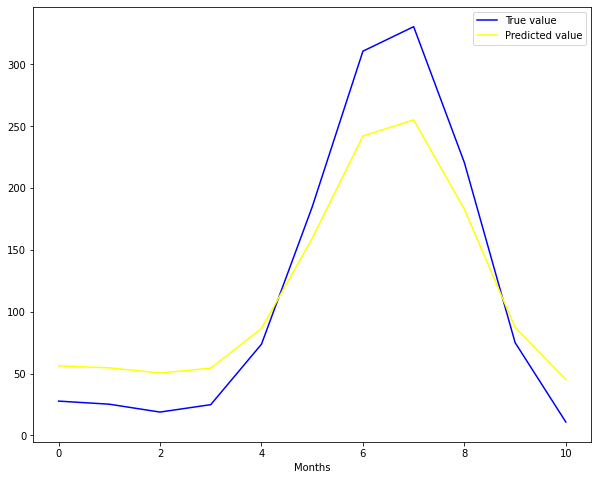

In [24]:
model = jb.load("models/Jharkhand.model")

inputs = [27.8,25.3,18.93,24.93,73.8,184.8,310.7,330.5,220.6,75.09,10.88,7.09]

outputs= []
for i in inputs[:-1]:
    t = model.predict([[i]])
    outputs.append(t)

import matplotlib.pyplot  as plt
plt.figure(figsize = (10,8))
plt.plot(inputs[:-1], label = "True value",color='blue')
plt.plot(outputs , label = "Predicted value",color='yellow')
plt.xlabel("Months")
plt.legend()
plt.show()

In [45]:
import itertools
t2 = list(itertools.permutations([5,2,0,5],3)) + list(itertools.permutations([5,2,0,5]))

t = [i for i in t2 if(2 in i)]
t2

[(5, 2, 0),
 (5, 2, 5),
 (5, 0, 2),
 (5, 0, 5),
 (5, 5, 2),
 (5, 5, 0),
 (2, 5, 0),
 (2, 5, 5),
 (2, 0, 5),
 (2, 0, 5),
 (2, 5, 5),
 (2, 5, 0),
 (0, 5, 2),
 (0, 5, 5),
 (0, 2, 5),
 (0, 2, 5),
 (0, 5, 5),
 (0, 5, 2),
 (5, 5, 2),
 (5, 5, 0),
 (5, 2, 5),
 (5, 2, 0),
 (5, 0, 5),
 (5, 0, 2),
 (5, 2, 0, 5),
 (5, 2, 5, 0),
 (5, 0, 2, 5),
 (5, 0, 5, 2),
 (5, 5, 2, 0),
 (5, 5, 0, 2),
 (2, 5, 0, 5),
 (2, 5, 5, 0),
 (2, 0, 5, 5),
 (2, 0, 5, 5),
 (2, 5, 5, 0),
 (2, 5, 0, 5),
 (0, 5, 2, 5),
 (0, 5, 5, 2),
 (0, 2, 5, 5),
 (0, 2, 5, 5),
 (0, 5, 5, 2),
 (0, 5, 2, 5),
 (5, 5, 2, 0),
 (5, 5, 0, 2),
 (5, 2, 5, 0),
 (5, 2, 0, 5),
 (5, 0, 5, 2),
 (5, 0, 2, 5)]

In [44]:
k = []
for i in t:
    string_ints = [str(j) for j in i]
    #print(string_ints)
    y = int("".join(string_ints))
    if('0' in str(y)):
        k.append(y)
set(k)

{205, 250, 502, 520, 2055, 2505, 2550, 5025, 5052, 5205, 5250, 5502, 5520}

In [ ]:
import itertools
t = list(itertools.permutations([5,2,0,5]))

for i in t:
	string_ints = [str(j) for j in i]
	print(int(",".join(string_ints)))